Read the csv and start working on it

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Read the CSV file
df = pd.read_csv('Food_nutrions_fact.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Columns: 151 entries, food_id to carotene, alpha
dtypes: float64(5), int64(1), object(145)
memory usage: 9.0+ MB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17704\3167493993.py:2: DtypeWarning: Columns (116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Food_nutrions_fact.csv')


In [7]:
# Data may contain '-' as missing value, count the number of missing values
missing_values = df.isin(['-']).sum()
print(missing_values.sort_values(ascending=True).head(50))
missing_values['total sugars']

food_id                                  0
food_name                                0
food_group                               0
energy                                   0
total lipid (fat)                        0
carbohydrate, by difference              0
water                                    0
protein                                  0
ash                                      3
iron, fe                                80
sodium, na                              84
calcium, ca                             85
potassium, k                           277
phosphorus, p                          326
fatty acids, total saturated           343
riboflavin                             372
magnesium, mg                          372
zinc, zn                               387
thiamin                                391
niacin                                 391
cholesterol                            399
vitamin a, iu                          437
vitamin c, total ascorbic acid         461
copper, cu 

1786

Tính số phần trăm mà từng loại dưỡng chất có giá trị, so với tổng số lượng mẫu, để xem thử tần suất xuất hiện của từng loại dưỡng chất trong tập dữ liệu


In [8]:
# Calculate the percentage of missing values for each column
missing_values = df.isin(['-']).mean() * 100

# Base on missing values percentage, calculate the available percentage
available_values = 100 - missing_values

available_values.sort_values(ascending=False).head(50)




food_id                               100.000000
carbohydrate, by difference           100.000000
food_group                            100.000000
food_name                             100.000000
energy                                100.000000
total lipid (fat)                     100.000000
protein                               100.000000
water                                 100.000000
ash                                    99.961504
iron, fe                               98.973438
sodium, na                             98.922110
calcium, ca                            98.909278
potassium, k                           96.445528
phosphorus, p                          95.816759
fatty acids, total saturated           95.598614
riboflavin                             95.226485
magnesium, mg                          95.226485
zinc, zn                               95.034005
thiamin                                94.982677
niacin                                 94.982677
cholesterol         

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17704\3721722015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nutrient_count.sort_values(ascending=True), y=nutrient_count.sort_values(ascending=True).index, palette='Paired')


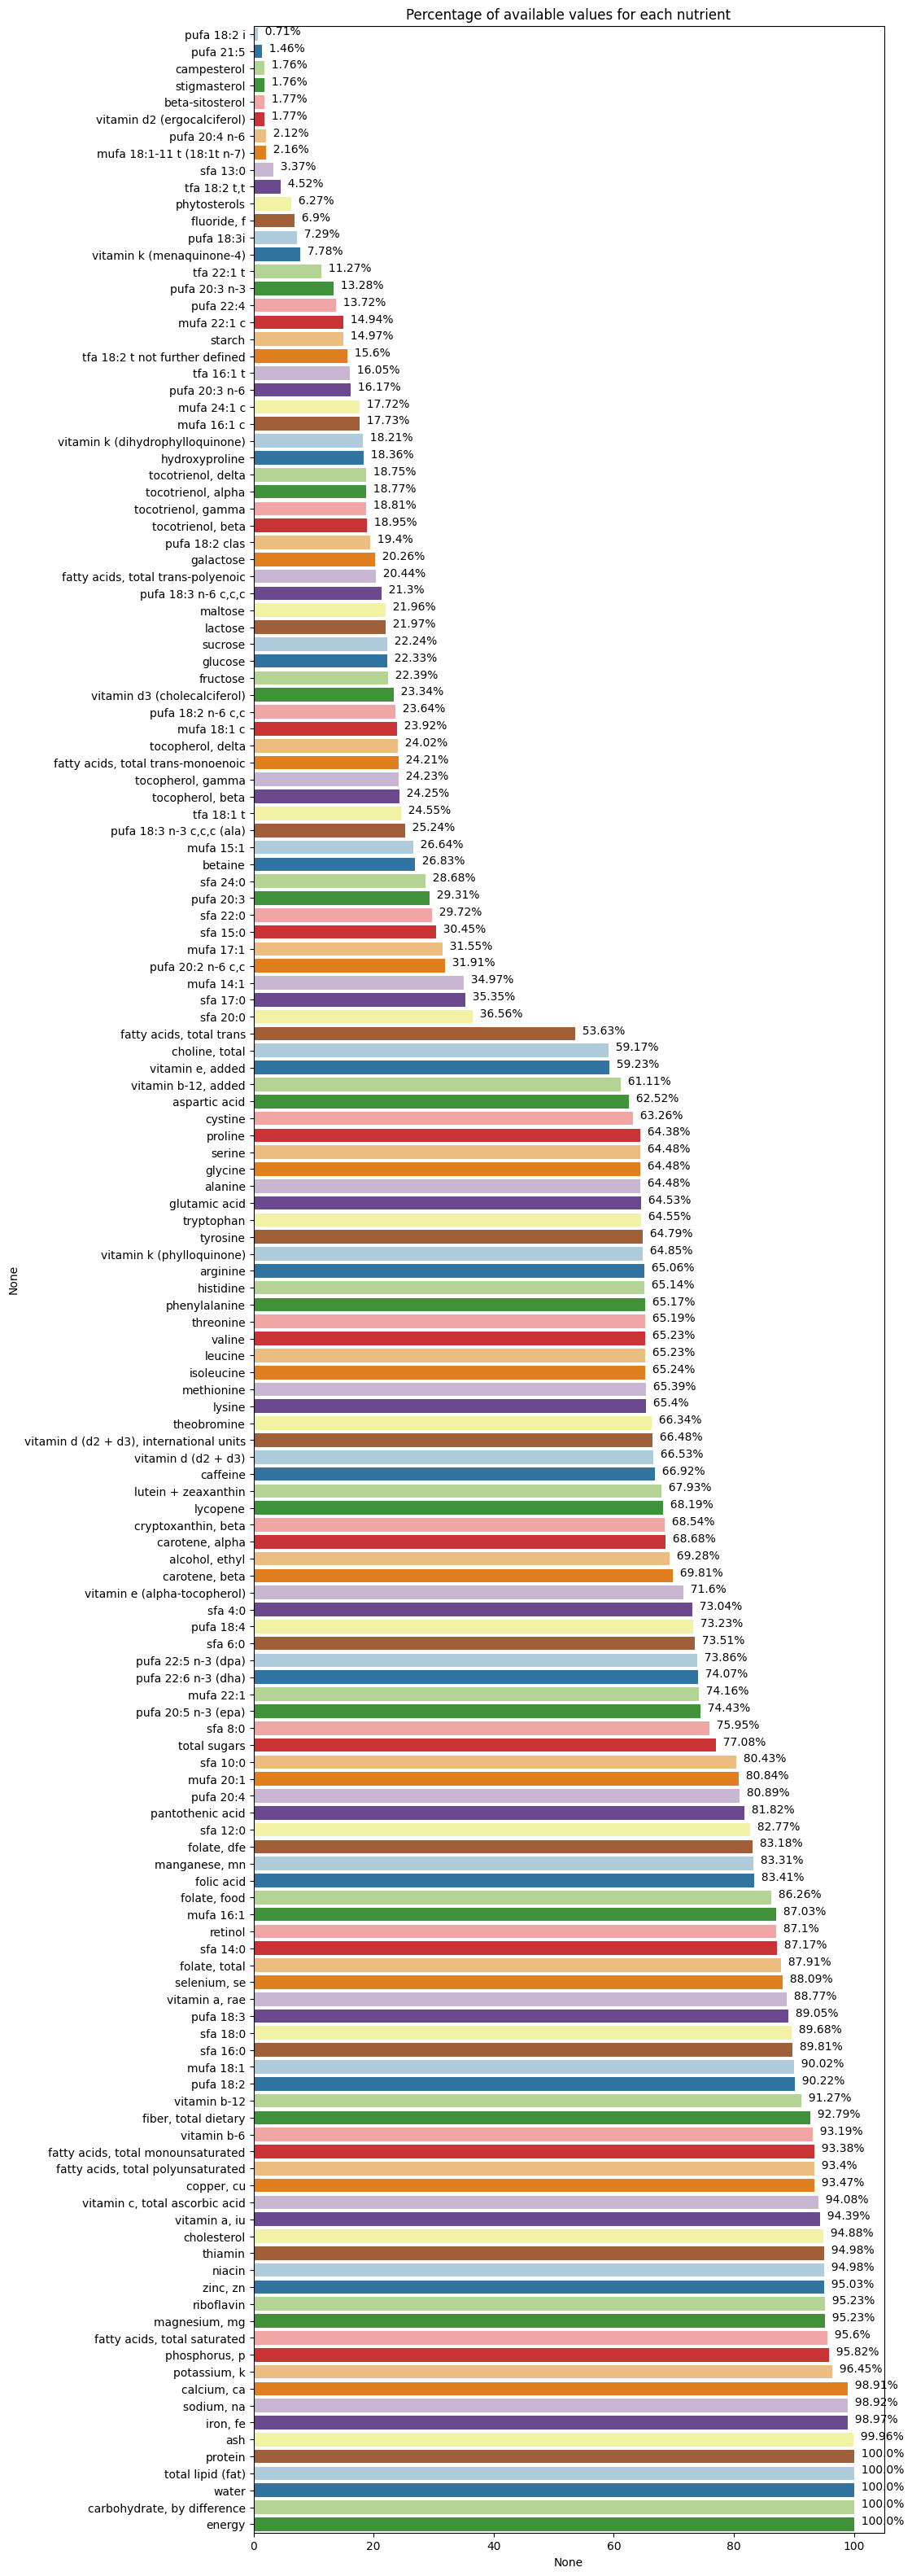

In [9]:
# Trực quan hóa dữ liệu, mỗi nutrient sẽ được đại diện bởi một cột, trục tung sẽ là số lượng các giá trị > 0
# Tạo một DataFrame mới, với mỗi cột là một nutrient, và giá trị là số lượng các giá trị > 0
nutrients = df.columns[3:]
nutrient_count = {}
for nutrient in nutrients:
    nutrient_count[nutrient] = (df[nutrient] != '-').sum() / len(df) * 100

nutrient_count = pd.Series(nutrient_count)
nutrient_count.sort_values(ascending=False)

# Trực quan hóa dữ liệu, theo chiều ngang để hiển thị được hết các nutrient, ghi thêm giá trị # trên đỉnh cột
plt.figure(figsize=(10, 40))
sns.barplot(x=nutrient_count.sort_values(ascending=True), y=nutrient_count.sort_values(ascending=True).index, palette='Paired')
for index, value in enumerate(nutrient_count.sort_values(ascending=True)):
    plt.text(value, index, '  ' + str(round(value, 2)) + '%')
plt.title('Percentage of available values for each nutrient')
plt.show()




Dựa vào sơ đồ trên => chỉ quan tâm những loại dưỡng chất có mức giá trị lớn hơn 50%

Dựa trên kiến thức về thực tiễn, các nhóm dưỡng chất chính cần thiết thường xuyên suất hiện và ảnh hưởng đến quyết định lựa chọn sản phẩm bao gồm

1. Nhóm đại dưỡng chất:
    - Protein: tương ứng với cột trên đồ thị: protein
    - Fat: tương ứng với: total lipid (fat) => không cần quan tâm đến các loại fat khác
    - Carbohydrate: tương ứng với: carbohydrate, by difference ( cũng là total carbohydrate)
    - Fiber: chất xơ, tương ứng với: fiber, total dietary   
    - Water: tương ứng với: water

2. Nhóm vi lượng dinh dưỡng:
* Vitamin:
    Vitamin A, rae: Vitamin A (mcg) -> bỏ qua Vitamin A, IU
    Vitamin B-6: Vitamin B6 (mg)
    Vitamin B-12: Vitamin B12 (mcg)
    Vitamin C, total ascorbic acid: Vitamin C (mg)
    Vitamin D (d2 + d3): Vitamin D (mcg) -> bỏ qua Vitamin D, IU, Vitamin D2 (ergocalciferol), Vitamin D3 (cholecalciferol)
    Vitamin E (alpha-tocopherol): Vitamin E (mg) bỏ qua Vitamin E, added
    Vitamin K (phylloquinone): Vitamin K (mcg) -> bỏ qua Vitamin K1 và K2
    Thiamin: Vitamin B1 (mg)
    Riboflavin: Vitamin B2 (mg)
    Niacin: Vitamin B3 (mg)
    Folate, total: Vitamin B9 (mcg) -> bỏ qua folate, food

* Mineral:
    Calcium, ca: Canxi (mg)
    Iron, fe: Sắt (mg)
    Magnesium, mg: Magie (mg)
    Phosphorus, p: Phốt pho (mg)
    Potassium, k: Kali (mg)
    Sodium, na: Natri (mg)
    Zinc, zn: Kẽm (mg)

3. Energy: năng lượng, tương ứng với:



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17704\2423709915.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nutrient_count.sort_values(ascending=True), y=nutrient_count.sort_values(ascending=True).index, palette='Paired')


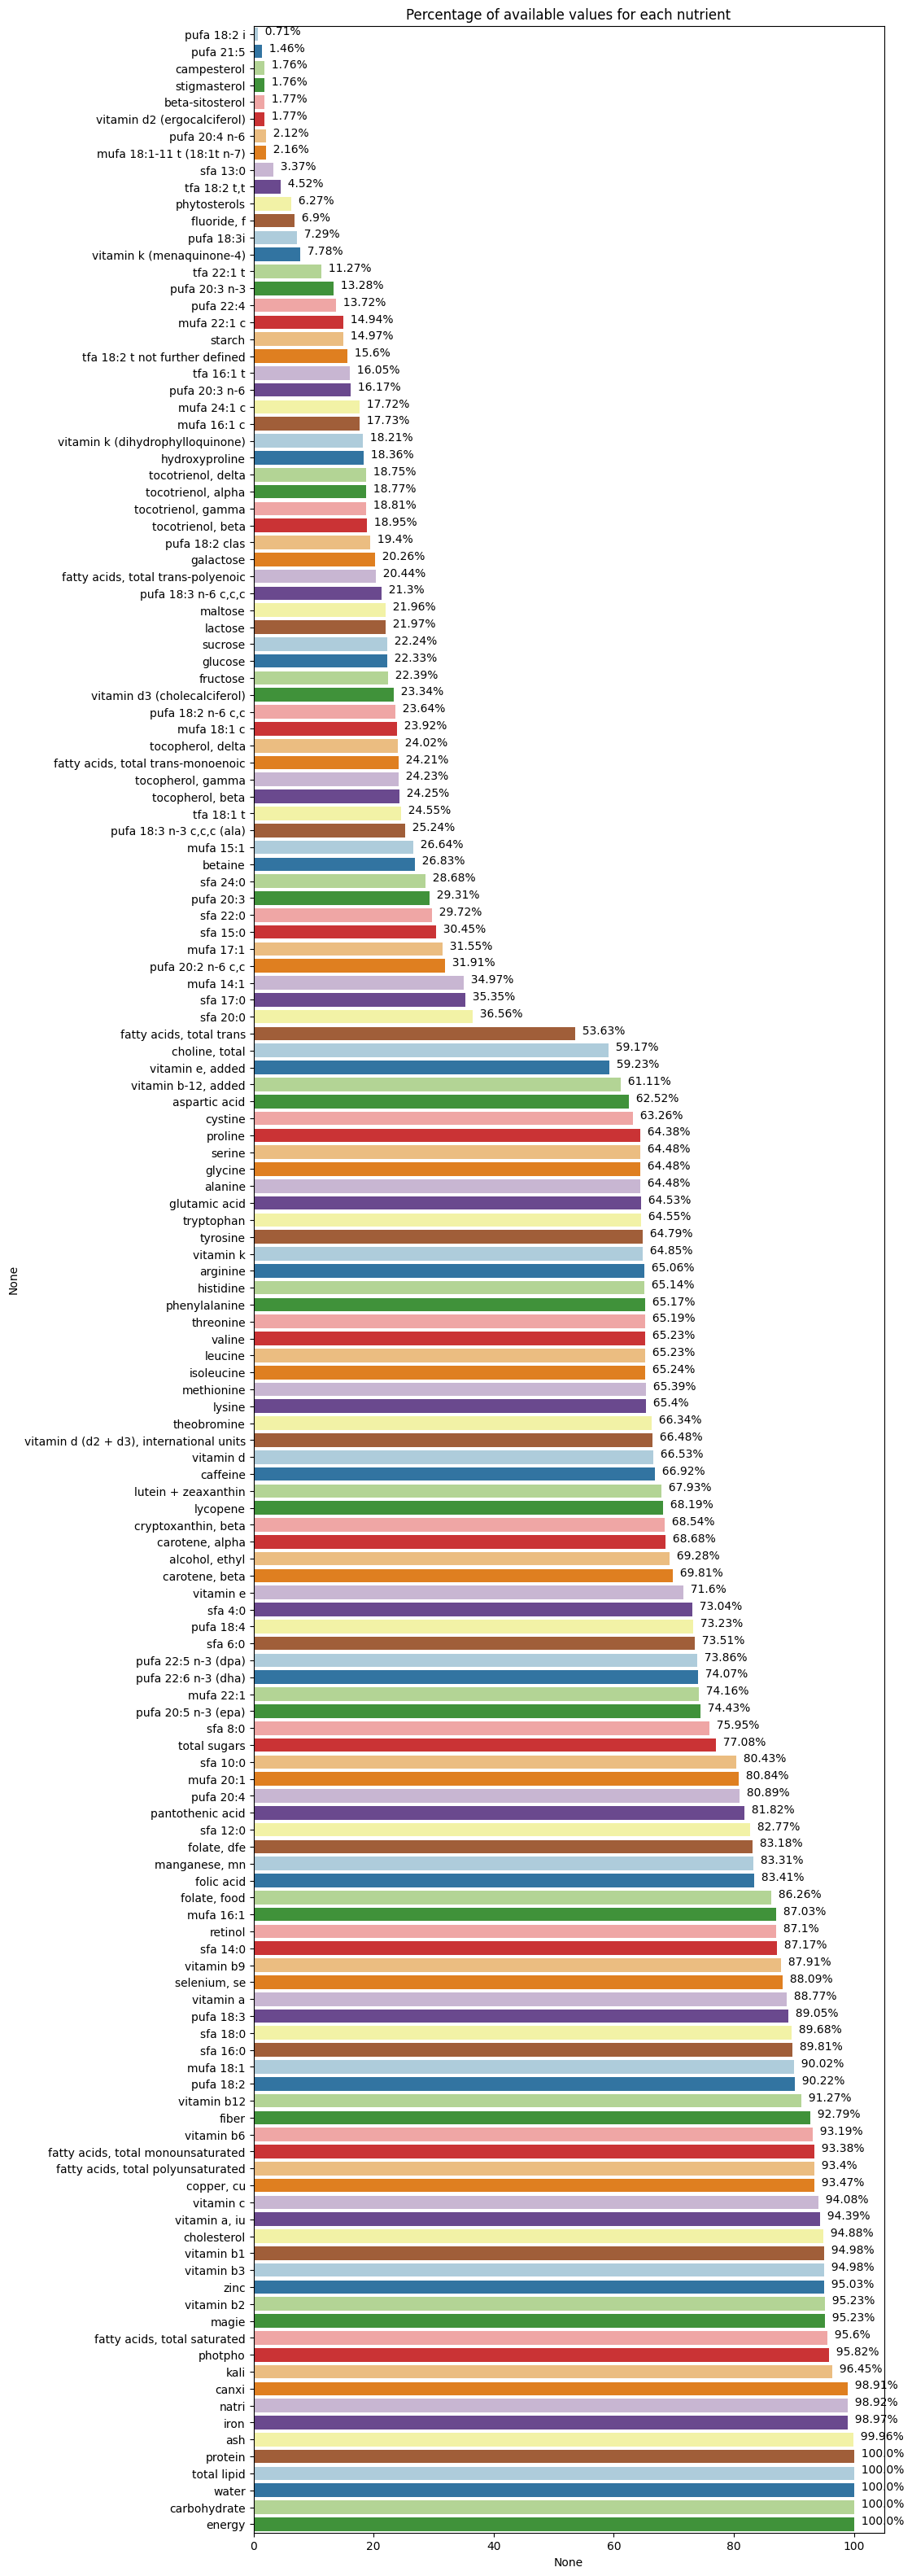

In [10]:
# Thay đổi một số tên cột cho dễ hiểu hơn
columns = {}

columns['total lipid (fat)'] = 'total lipid'
columns['carbohydrate, by difference'] = 'carbohydrate'
columns['fiber, total dietary'] = 'fiber'
columns['vitamin a, rae'] = 'vitamin a'
columns['vitamin c, total ascorbic acid'] = 'vitamin c'
columns['vitamin b-6'] = 'vitamin b6'
columns['vitamin b-12'] = 'vitamin b12'
columns['vitamin d (d2 + d3)'] = 'vitamin d'
columns['vitamin e (alpha-tocopherol)'] = 'vitamin e'
columns['vitamin k (phylloquinone)'] = 'vitamin k'
columns['thiamin'] = 'vitamin b1'
columns['riboflavin'] = 'vitamin b2'
columns['niacin'] = 'vitamin b3'
columns['folate, total'] = 'vitamin b9'
columns['calcium, ca'] = 'canxi'
columns['iron, fe'] = 'iron'
columns['magnesium, mg'] = 'magie'
columns['phosphorus, p'] = 'photpho'
columns['potassium, k'] = 'kali'
columns['sodium, na'] = 'natri'
columns['zinc, zn'] = 'zinc'

df_filtered = df.rename(columns=columns)

nutrients = df_filtered.columns[3:]
nutrient_count = {}
for nutrient in nutrients:
    nutrient_count[nutrient] = (df_filtered[nutrient] != '-').sum() / len(df_filtered) * 100

nutrient_count = pd.Series(nutrient_count)
nutrient_count.sort_values(ascending=False)

# Trực quan hóa dữ liệu, theo chiều ngang để hiển thị được hết các nutrient, ghi thêm giá trị # trên đỉnh cột
plt.figure(figsize=(10, 40))
sns.barplot(x=nutrient_count.sort_values(ascending=True), y=nutrient_count.sort_values(ascending=True).index, palette='Paired')
for index, value in enumerate(nutrient_count.sort_values(ascending=True)):
    plt.text(value, index, '  ' + str(round(value, 2)) + '%')
plt.title('Percentage of available values for each nutrient')
plt.show()



Có thể thấy, những nguyên tố, vi lượng có tần suất xuất hiện cao nhất gần như tương ứng với những nguyên tố, vi lượng cần thiết cho cơ thể, nên ta sẽ chọn những nguyên tố, vi lượng này làm tập dữ liệu đầu vào

In [11]:
needed_columns = ['food_name', 'water', 'energy', 'protein', 'total lipid', 'fiber', 'total sugars', 'canxi', 'iron', 'magie', 'photpho', 'kali', 'natri', 'zinc', 'vitamin c', 'vitamin b3', 'vitamin b2', 'vitamin b1', 'vitamin b6', 'vitamin b9', 'vitamin b12', 'vitamin a', 'vitamin e', 'vitamin d', 'vitamin k', 'cholesterol']

df_filtered = df_filtered[needed_columns]

df_filtered

,food_name,water,energy,protein,total lipid,fiber,total sugars,canxi,iron,magie,...,vitamin b2,vitamin b1,vitamin b6,vitamin b9,vitamin b12,vitamin a,vitamin e,vitamin d,vitamin k,cholesterol
0,"abiyuch, raw",79.9,69.0,1.50,0.10,5.3,8.55,8.0,1.61,24.0,...,-,-,-,-,-,5.0,-,-,-,-
1,"acerola juice, raw",94.3,23.0,0.40,0.30,0.3,4.5,10.0,0.5,12.0,...,0.06,0.02,0.004,14.0,0.0,25.0,0.18,-,1.4,0.0
2,"acerola, (west indian cherry), raw",91.4,32.0,0.40,0.30,1.1,-,12.0,0.2,18.0,...,0.06,0.02,0.009,14.0,0.0,38.0,-,-,-,0.0
3,acorn stew (apache),79.8,95.0,6.81,3.47,0.7,0.34,14.0,1.0,12.0,...,0.125,0.175,0.055,33.0,0.68,0.0,0.3,-,0.0,20.0
4,"agave, cooked (southwest)",65.4,563.0,0.99,0.29,10.6,20.9,460,3.55,39.0,...,0.099,0.012,0.087,3.0,0.0,6.0,0.36,0.0,4.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,"yogurt, vanilla, low fat, fortified with vitam...",79.0,358.0,4.93,1.25,0.0,13.8,171,0.07,16.0,...,0.201,0.042,0.045,11.0,0.53,12.0,0.02,1.2,0.1,5.0
7789,"yogurt, vanilla, low fat.",79.0,85.0,4.93,1.25,0.0,13.8,171,0.07,16.0,...,0.201,0.042,0.045,11.0,0.53,12.0,0.02,0.0,0.1,5.0
7790,"yogurt, vanilla, non-fat",79.0,78.0,2.94,0.00,0.0,5.88,118,0.0,16.0,...,0.2,0.042,0.045,11.0,0.53,61.0,0.01,0.9,0.0,3.0
7791,"yokan, prepared from adzuki beans and sugar",35.4,260.0,3.29,0.12,-,-,27.0,1.16,18.0,...,0.004,0.005,0.008,8.0,0.0,0.0,-,0.0,-,0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17704\2164564660.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nutrient_count.sort_values(ascending=True), y=nutrient_count.sort_values(ascending=True).index, palette='Paired')


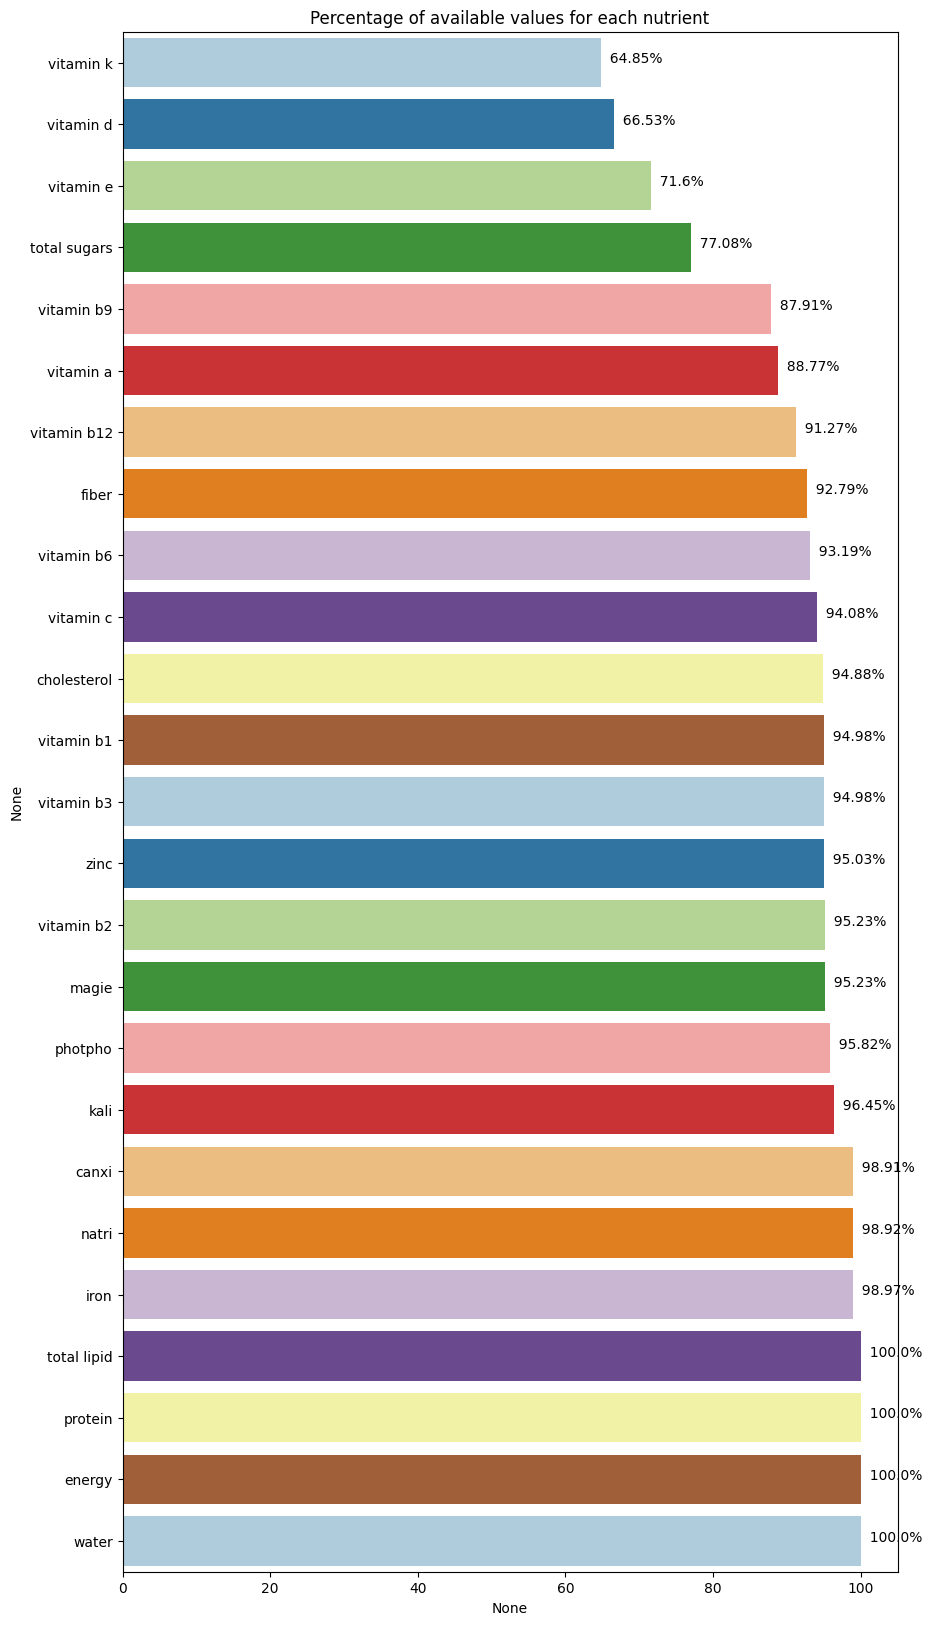

In [12]:
nutrients = df_filtered.columns[1:]
nutrient_count = {}
for nutrient in nutrients:
    nutrient_count[nutrient] = (df_filtered[nutrient] != '-').sum() / len(df_filtered) * 100

nutrient_count = pd.Series(nutrient_count)
nutrient_count.sort_values(ascending=False)

# Trực quan hóa dữ liệu, theo chiều ngang để hiển thị được hết các nutrient, ghi thêm giá trị # trên đỉnh cột
plt.figure(figsize=(10, 20))
sns.barplot(x=nutrient_count.sort_values(ascending=True), y=nutrient_count.sort_values(ascending=True).index, palette='Paired')
for index, value in enumerate(nutrient_count.sort_values(ascending=True)):
    plt.text(value, index, '  ' + str(round(value, 2)) + '%')
plt.title('Percentage of available values for each nutrient')
plt.show()

In [13]:
df_normalized = df_filtered.copy()

# min-max normalization
for nutrient in nutrients:
    if nutrient != 'food_name':
        df_normalized[nutrient] = pd.to_numeric(df_normalized[nutrient], errors='coerce')
        df_normalized[nutrient] = (df_normalized[nutrient] - df_normalized[nutrient].min()) / (df_normalized[nutrient].max() - df_normalized[nutrient].min())

df_normalized

,food_name,water,energy,protein,total lipid,fiber,total sugars,canxi,iron,magie,...,vitamin b2,vitamin b1,vitamin b6,vitamin b9,vitamin b12,vitamin a,vitamin e,vitamin d,vitamin k,cholesterol
0,"abiyuch, raw",0.799,0.018302,0.016988,0.0010,0.067089,0.085671,0.001087,0.012984,0.030730,...,NaN,NaN,NaN,NaN,NaN,0.000167,NaN,NaN,NaN,NaN
1,"acerola juice, raw",0.943,0.006101,0.004530,0.0030,0.003797,0.045090,0.001359,0.004032,0.015365,...,0.003429,0.000855,0.000500,0.003694,0.000000,0.000833,0.001208,NaN,0.000819,0.000000
2,"acerola, (west indian cherry), raw",0.914,0.008488,0.004530,0.0030,0.013924,NaN,0.001630,0.001613,0.023047,...,0.003429,0.000855,0.001125,0.003694,0.000000,0.001267,NaN,NaN,NaN,0.000000
3,acorn stew (apache),0.798,0.025199,0.077123,0.0347,0.008861,0.003407,0.001902,0.008065,0.015365,...,0.007143,0.007479,0.006875,0.008707,0.006876,0.000000,0.002013,NaN,0.000000,0.006452
4,"agave, cooked (southwest)",0.654,0.149337,0.011212,0.0029,0.134177,0.209419,0.062500,0.028629,0.049936,...,0.005657,0.000513,0.010875,0.000792,0.000000,0.000200,0.002416,0.0000,0.002865,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,"yogurt, vanilla, low fat, fortified with vitam...",0.790,0.094960,0.055832,0.0125,0.000000,0.138277,0.023234,0.000565,0.020487,...,0.011486,0.001795,0.005625,0.002902,0.005359,0.000400,0.000134,0.0048,0.000058,0.001613
7789,"yogurt, vanilla, low fat.",0.790,0.022546,0.055832,0.0125,0.000000,0.138277,0.023234,0.000565,0.020487,...,0.011486,0.001795,0.005625,0.002902,0.005359,0.000400,0.000134,0.0000,0.000058,0.001613
7790,"yogurt, vanilla, non-fat",0.790,0.020690,0.033296,0.0000,0.000000,0.058918,0.016033,0.000000,0.020487,...,0.011429,0.001795,0.005625,0.002902,0.005359,0.002033,0.000067,0.0036,0.000000,0.000968
7791,"yokan, prepared from adzuki beans and sugar",0.354,0.068966,0.037259,0.0012,NaN,NaN,0.003668,0.009355,0.023047,...,0.000229,0.000214,0.001000,0.002111,0.000000,0.000000,NaN,0.0000,NaN,0.000000


THay các giá trị nan thành -1, biểu thị mức độ không liên quan trong sản phẩm

In [14]:
df_replacenan = df_normalized.copy()

# replace NaN values with -1
df_replacenan.fillna(-1, inplace=True)

# corr() from column 2 to the end
corr = df_replacenan.iloc[:, 1:].corr()
corr

,water,energy,protein,total lipid,fiber,total sugars,canxi,iron,magie,photpho,...,vitamin b2,vitamin b1,vitamin b6,vitamin b9,vitamin b12,vitamin a,vitamin e,vitamin d,vitamin k,cholesterol
water,1.000000,-0.594210,-0.130569,-0.508633,-0.114410,-0.139354,-0.085498,-0.159069,-0.130620,-0.046399,...,-0.031780,-0.044583,-0.052929,-0.053853,0.028877,0.040005,-0.017529,0.043097,0.010214,0.002284
energy,-0.594210,1.000000,0.047851,0.593945,0.109955,0.230293,0.036761,0.059356,0.019730,-0.003311,...,-0.012942,0.001462,0.003675,-0.012244,-0.052208,-0.030685,0.148740,0.008384,0.102011,-0.001154
protein,-0.130569,0.047851,1.000000,0.055728,0.023380,-0.080379,0.063999,0.122072,0.136956,0.141086,...,0.113705,0.101767,0.134182,-0.027364,0.159435,0.100548,0.026205,-0.092769,-0.037946,0.167578
total lipid,-0.508633,0.593945,0.055728,1.000000,0.023149,0.005123,-0.013761,-0.022089,0.008273,0.011488,...,-0.009149,0.001112,-0.006673,-0.025837,-0.014595,-0.000200,0.044154,-0.087465,-0.017223,0.038803
fiber,-0.114410,0.109955,0.023380,0.023149,1.000000,0.395545,0.282826,0.283404,0.215860,0.147635,...,0.201681,0.181059,0.262807,0.294307,0.195440,0.286186,0.351192,0.220790,0.335353,0.262407
total sugars,-0.139354,0.230293,-0.080379,0.005123,0.395545,1.000000,0.113935,0.093085,0.018177,-0.019114,...,0.007847,-0.001090,0.067978,0.071289,0.002638,0.091608,0.700037,0.386354,0.670431,0.067923
canxi,-0.085498,0.036761,0.063999,-0.013761,0.282826,0.113935,1.000000,0.724493,0.424238,0.358717,...,0.361193,0.334036,0.352547,0.264346,0.319506,0.244875,0.105047,0.149506,0.133936,0.333851
iron,-0.159069,0.059356,0.122072,-0.022089,0.283404,0.093085,0.724493,1.000000,0.418375,0.360468,...,0.358841,0.337707,0.351701,0.262086,0.304403,0.223765,0.088278,0.132111,0.111371,0.317542
magie,-0.130620,0.019730,0.136956,0.008273,0.215860,0.018177,0.424238,0.418375,1.000000,0.792928,...,0.717517,0.707057,0.752079,0.530015,0.625275,0.416659,0.283093,0.309670,0.268560,0.227616
photpho,-0.046399,-0.003311,0.141086,0.011488,0.147635,-0.019114,0.358717,0.360468,0.792928,1.000000,...,0.741702,0.765954,0.706720,0.456507,0.590636,0.413117,0.281294,0.258171,0.274703,0.177771


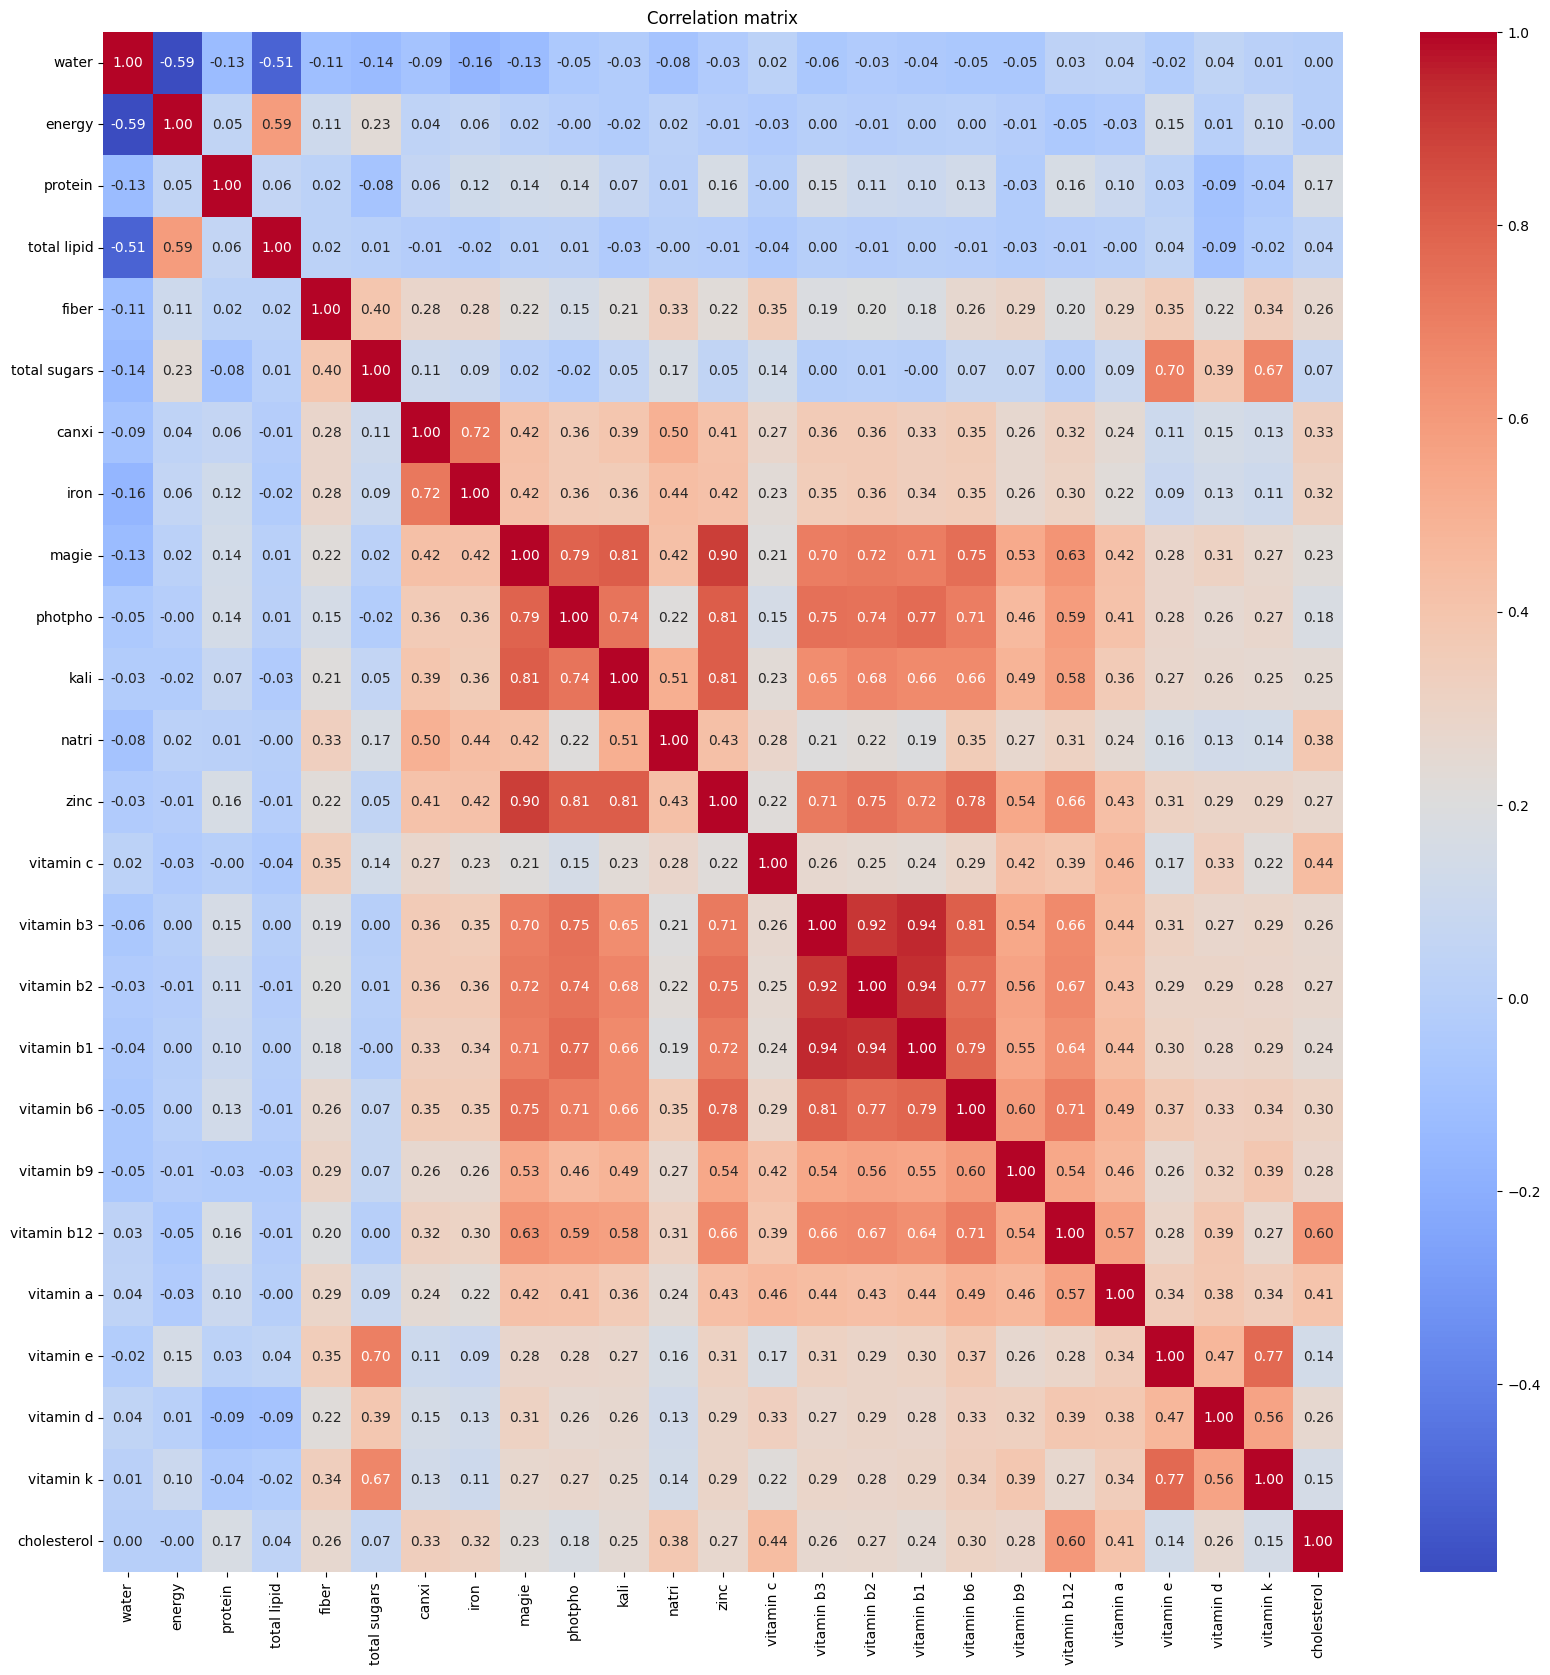

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

Lấy mẫu ngẫu nhiên từ trong tâp dataset, lấy khoảng 2000 mẫu

In [96]:
# Chọn 2 ngàn mẫu ngẫu nhiên từ df_filtered
df_sample = df_filtered.sample(n=2000, random_state=0)

df_sample

df_sample.replace('-', np.nan, inplace=True)

# Đổi kiểu dữ liệu của các cột từ 'object' sang 'float', bắt đầu từ cột 1
for column in df_sample.columns[1:]:
    df_sample[column] = df_sample[column].astype(float)

# min-max normalization
for nutrient in nutrients:
    if nutrient != 'food_name':
        df_sample[nutrient] = pd.to_numeric(df_sample[nutrient], errors='coerce')
        df_sample[nutrient] = (df_sample[nutrient] - df_sample[nutrient].min()) / (df_sample[nutrient].max() - df_sample[nutrient].min())


In [98]:
df_sample.replace(np.nan, -1, inplace=True)

In [74]:
df_sample.iloc[:, 1:].corr()

,water,energy,protein,total lipid,fiber,total sugars,canxi,iron,magie,photpho,...,vitamin b2,vitamin b1,vitamin b6,vitamin b9,vitamin b12,vitamin a,vitamin e,vitamin d,vitamin k,cholesterol
water,1.000000,-0.599557,-0.141777,-0.528294,-0.149581,-0.107054,-0.104134,-0.207142,-0.110864,-0.020904,...,-0.035300,-0.051178,-0.046219,-0.061101,0.023239,0.023018,-0.014950,0.047257,0.026680,-0.005102
energy,-0.599557,1.000000,0.033917,0.582775,0.115496,0.217749,0.027968,0.046720,0.016188,-0.022328,...,-0.022406,0.003550,-0.002291,-0.006609,-0.041714,-0.027057,0.161684,0.033170,0.096925,-0.000521
protein,-0.141777,0.033917,1.000000,0.049921,0.016882,-0.095026,0.059689,0.139593,0.162758,0.152534,...,0.121987,0.103980,0.156546,-0.022887,0.155914,0.099120,0.011212,-0.086155,-0.042683,0.155662
total lipid,-0.528294,0.582775,0.049921,1.000000,0.043728,-0.001799,-0.005621,-0.028428,0.022534,0.010957,...,-0.003630,0.018480,-0.002095,-0.006654,-0.008999,0.011240,0.078198,-0.062146,-0.018016,0.021820
fiber,-0.149581,0.115496,0.016882,0.043728,1.000000,0.396296,0.285772,0.198987,0.187794,0.106019,...,0.191073,0.170351,0.239250,0.293754,0.188638,0.308398,0.349433,0.227399,0.328914,0.261867
total sugars,-0.107054,0.217749,-0.095026,-0.001799,0.396296,1.000000,0.139792,0.062943,-0.000784,-0.051718,...,0.005777,-0.004059,0.063874,0.079900,0.007768,0.110717,0.710415,0.383842,0.684246,0.087435
canxi,-0.104134,0.027968,0.059689,-0.005621,0.285772,0.139792,1.000000,0.647397,0.429248,0.335225,...,0.358955,0.336061,0.339215,0.260554,0.321648,0.255944,0.123782,0.156194,0.138568,0.362175
iron,-0.207142,0.046720,0.139593,-0.028428,0.198987,0.062943,0.647397,1.000000,0.389358,0.313630,...,0.310780,0.306772,0.280236,0.216429,0.244144,0.174434,0.071654,0.108512,0.093090,0.245987
magie,-0.110864,0.016188,0.162758,0.022534,0.187794,-0.000784,0.429248,0.389358,1.000000,0.764430,...,0.661097,0.658700,0.688736,0.506247,0.604527,0.434940,0.290403,0.304309,0.270354,0.272767
photpho,-0.020904,-0.022328,0.152534,0.010957,0.106019,-0.051718,0.335225,0.313630,0.764430,1.000000,...,0.687099,0.714844,0.625008,0.410332,0.556176,0.408681,0.277972,0.250641,0.268375,0.156202


In [ ]:
# histplot all columns, using beuatiful color palette

plt.figure(figsize=(20, 30))
for index, column in enumerate(df_sample.columns[1:]):
    plt.subplot(5, 5, index + 1)
    sns.histplot(df_sample[column], bins=20, kde=True, color='skyblue')
    plt.title(column)

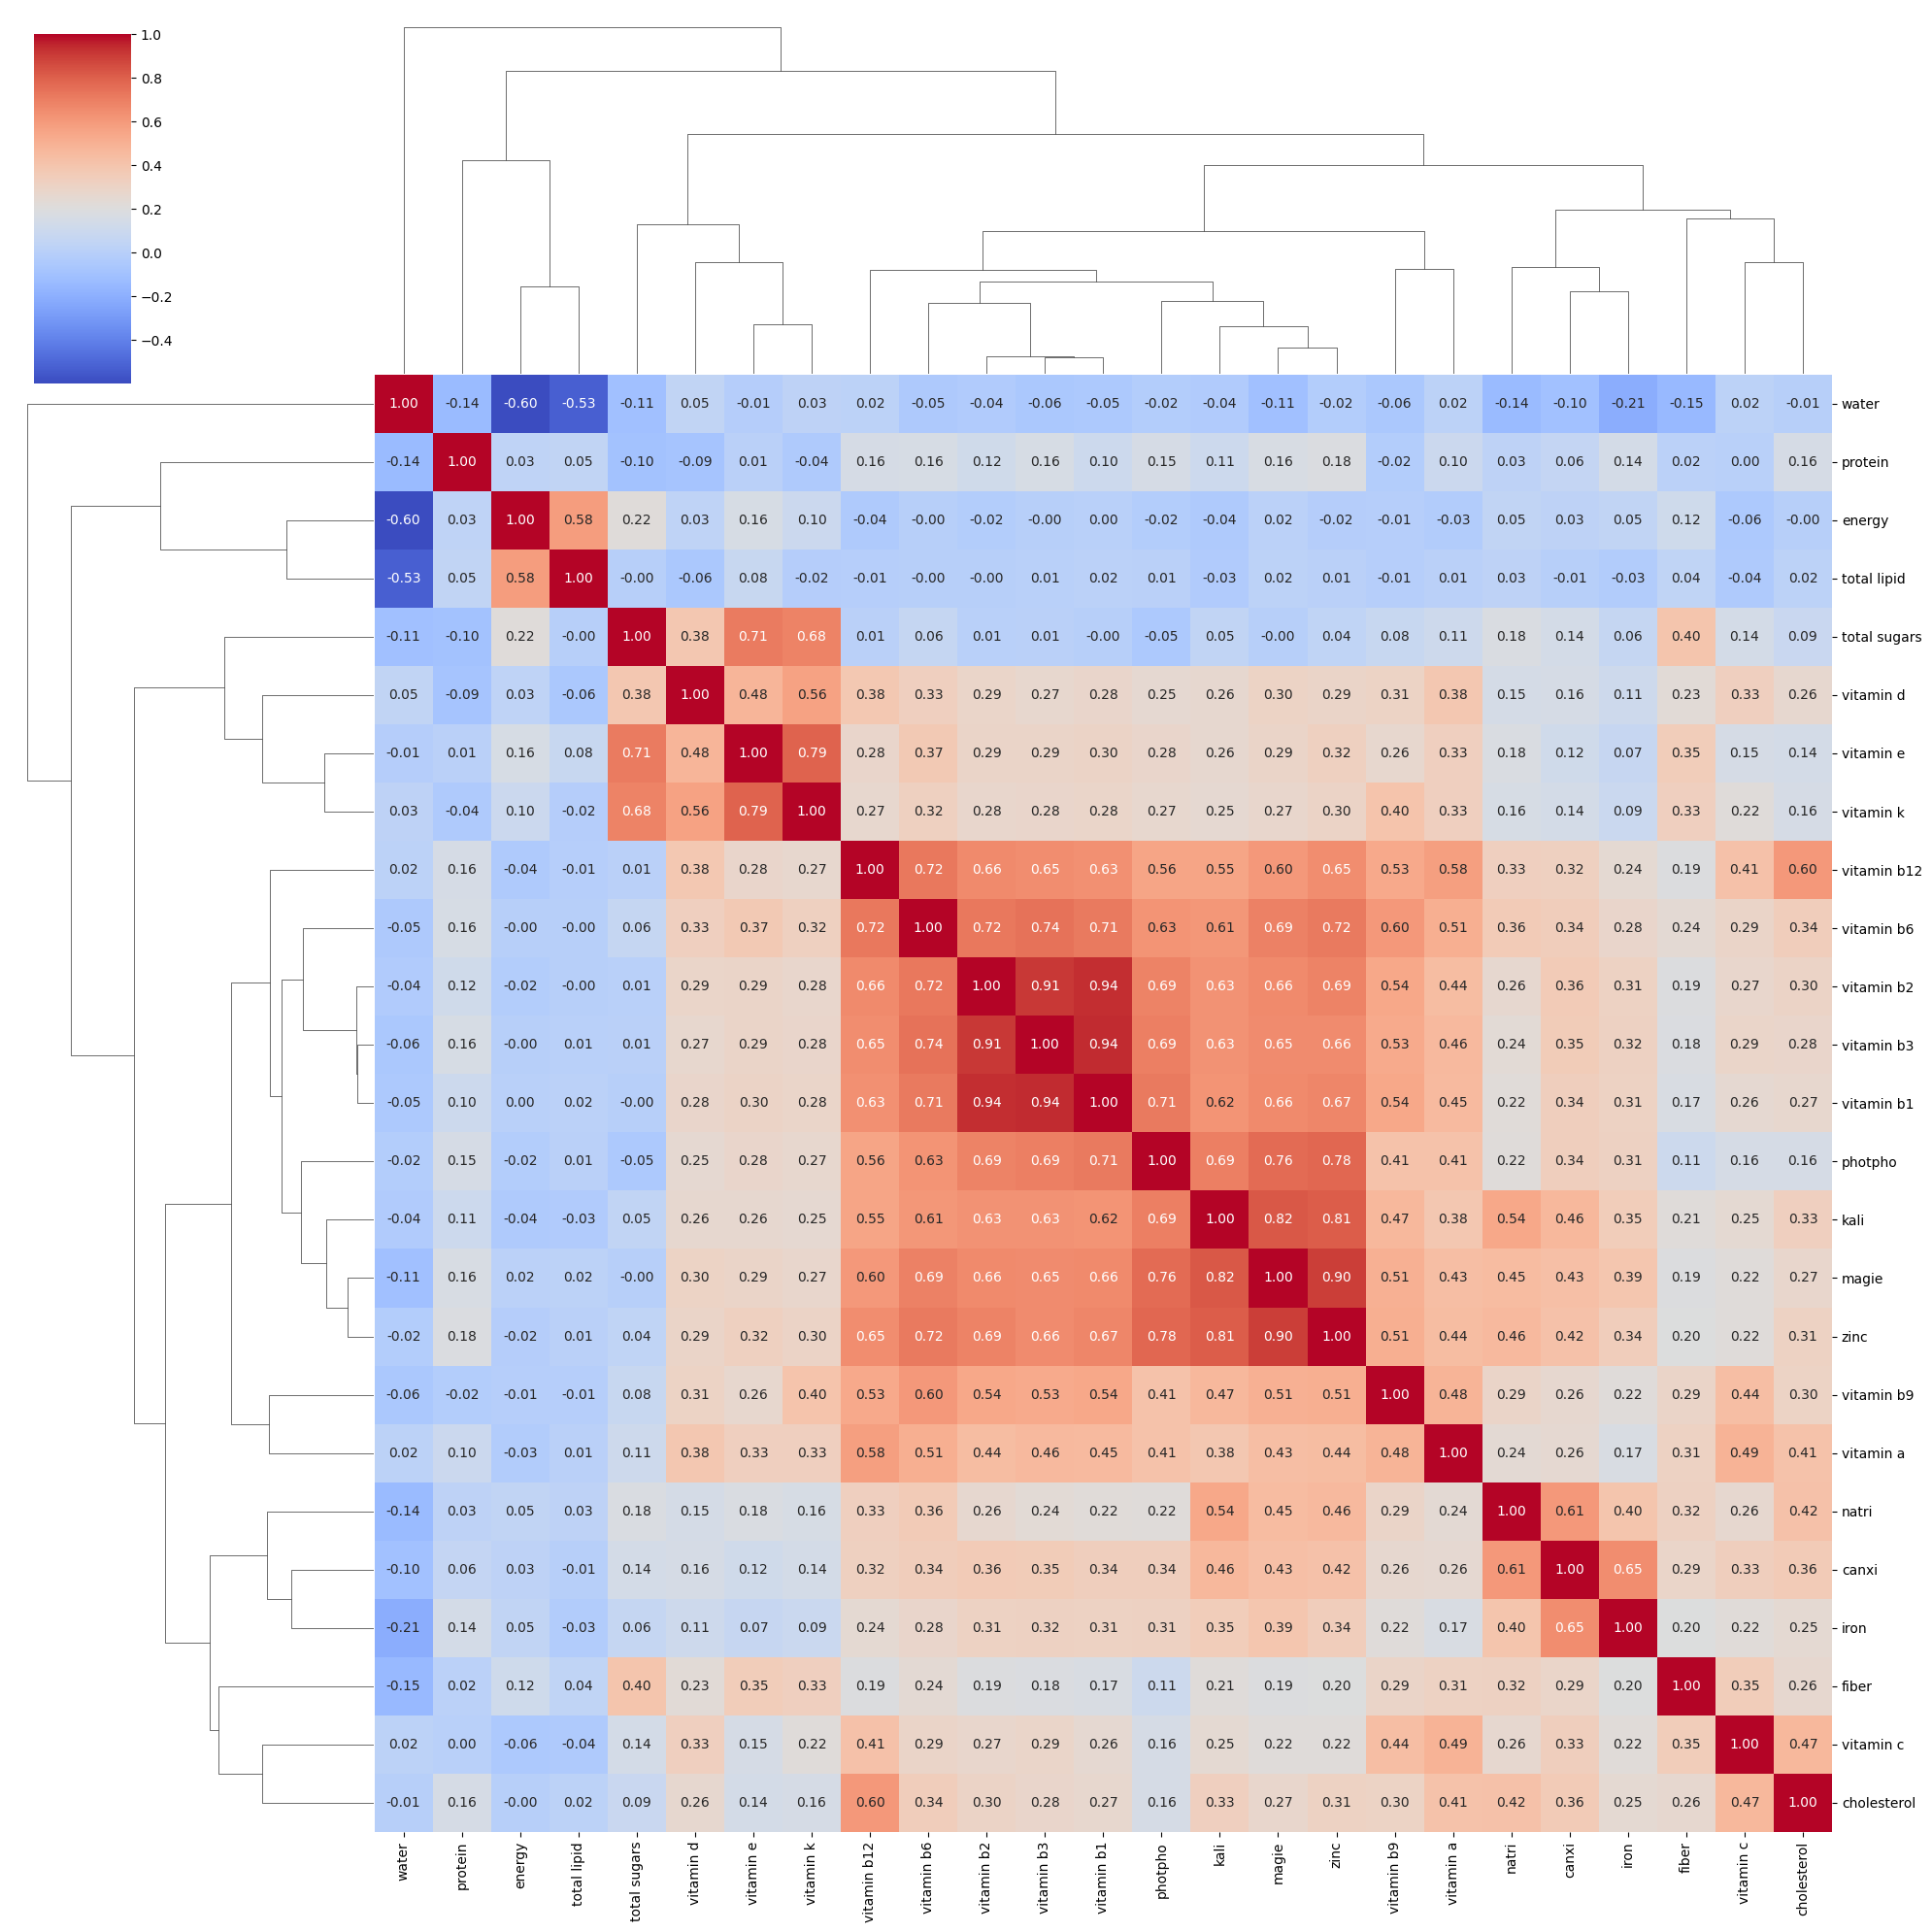

In [99]:
# cluster map, from column 1 to the end

sns.clustermap(df_sample.iloc[:, 1:].corr(), cmap='coolwarm', figsize=(20, 20), annot=True, fmt='.2f')

In [102]:
# from df_filtered, drop column that has missing values, assign to df_pure
df_pure = df_filtered.copy()
df_pure.replace('-', np.nan, inplace=True)
df_pure.dropna(inplace=True)

df_pure

,food_name,water,energy,protein,total lipid,fiber,total sugars,canxi,iron,magie,...,vitamin b2,vitamin b1,vitamin b6,vitamin b9,vitamin b12,vitamin a,vitamin e,vitamin d,vitamin k,cholesterol
4,"agave, cooked (southwest)",65.4,563.0,0.99,0.29,10.6,20.9,460,3.55,39.0,...,0.099,0.012,0.087,3.0,0.0,6.0,0.36,0.0,4.9,0.0
5,"agave, dried (southwest)",11.6,341.0,1.71,0.69,15.6,50.7,770,3.64,207,...,0.644,0.021,0.216,7.0,0.0,1.0,0.76,0.0,0.5,0.0
6,"agave, raw (southwest)",81.8,68.0,0.52,0.15,6.6,2.58,417,1.8,55.0,...,0.039,0.029,0.055,7.0,0.0,2.0,0.23,0.0,5.3,0.0
10,"alcoholic beverage, beer, light",94.9,123.0,0.24,0.00,0.0,0.09,4.0,0.03,5.0,...,0.015,0.005,0.034,6.0,0.02,0.0,0.0,0.0,0.0,0.0
13,"alcoholic beverage, beer, light, higher alcohol",92.9,46.0,0.25,0.00,0.0,0.09,4.0,0.03,5.0,...,0.015,0.005,0.034,6.0,0.02,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,"yogurt, vanilla or lemon flavor, nonfat milk, ...",87.4,43.0,3.86,0.18,0.0,7.5,143,0.12,13.0,...,0.162,0.034,0.037,8.0,0.43,2.0,0.0,1.2,0.0,2.0
7788,"yogurt, vanilla, low fat, fortified with vitam...",79.0,358.0,4.93,1.25,0.0,13.8,171,0.07,16.0,...,0.201,0.042,0.045,11.0,0.53,12.0,0.02,1.2,0.1,5.0
7789,"yogurt, vanilla, low fat.",79.0,85.0,4.93,1.25,0.0,13.8,171,0.07,16.0,...,0.201,0.042,0.045,11.0,0.53,12.0,0.02,0.0,0.1,5.0
7790,"yogurt, vanilla, non-fat",79.0,78.0,2.94,0.00,0.0,5.88,118,0.0,16.0,...,0.2,0.042,0.045,11.0,0.53,61.0,0.01,0.9,0.0,3.0


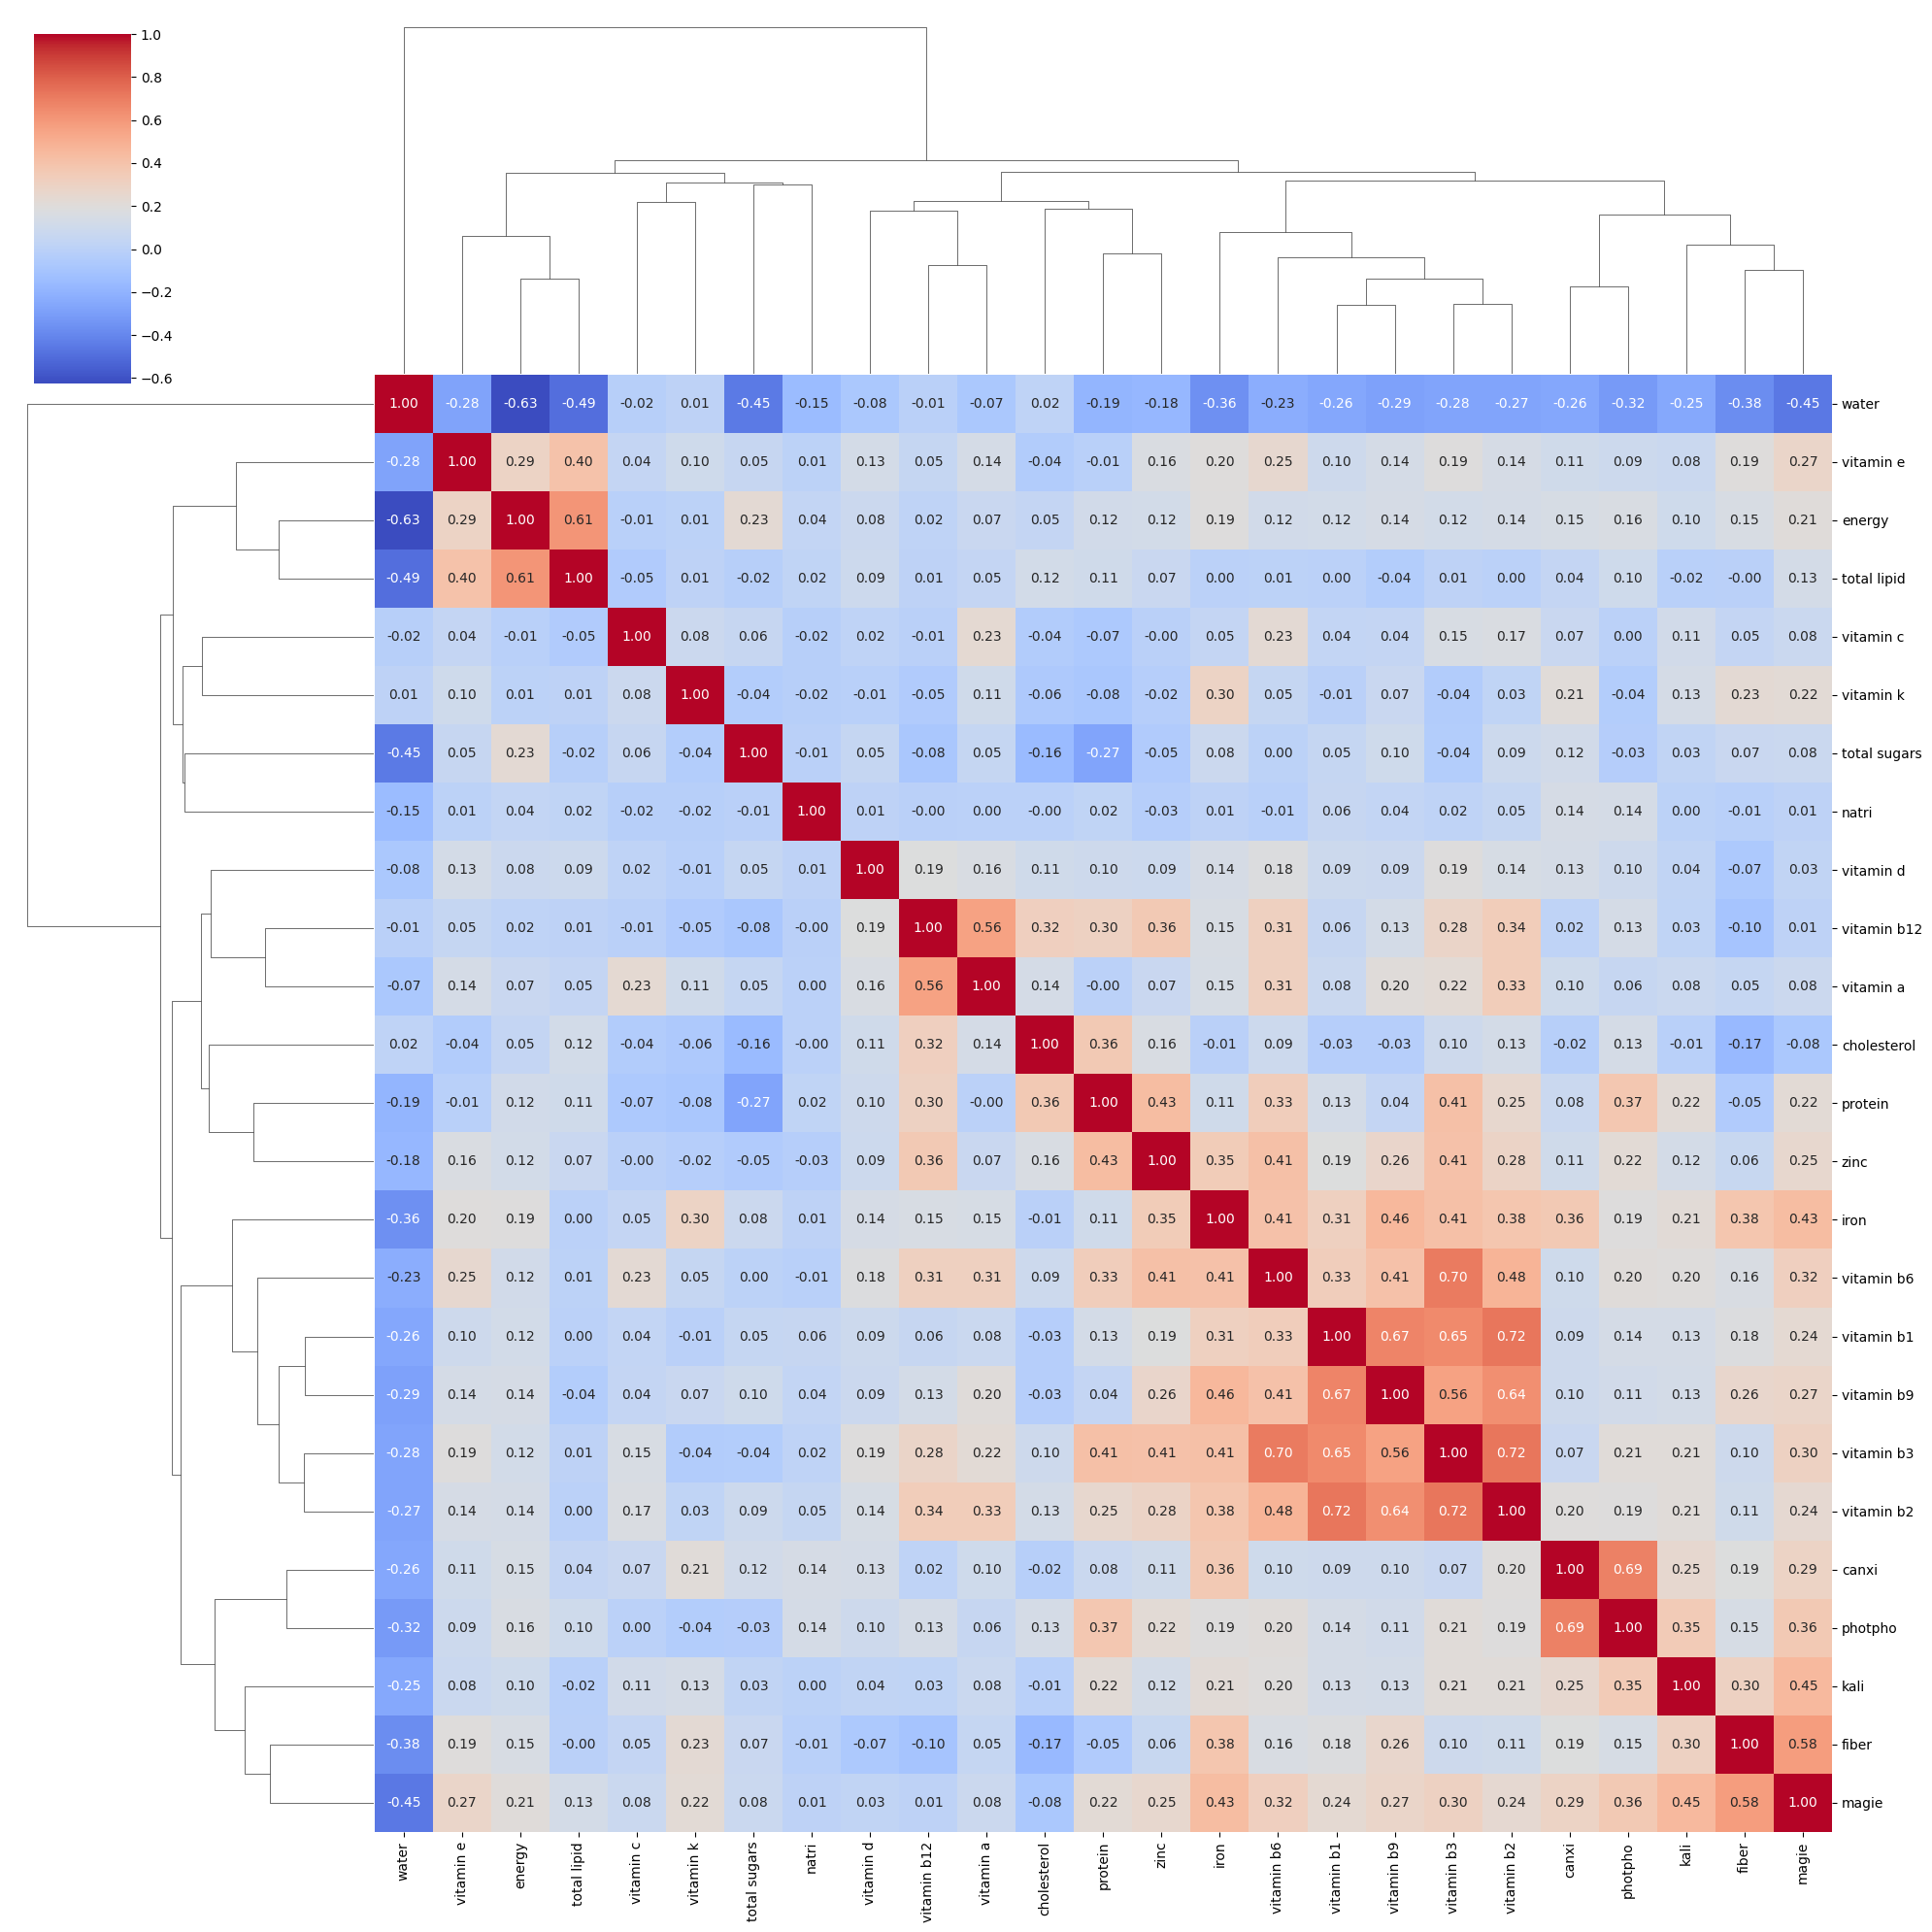

In [101]:
# Đổi kiểu dữ liệu của các cột từ 'object' sang 'float', bắt đầu từ cột 1
for column in df_pure.columns[1:]:
    df_pure[column] = df_pure[column].astype(float)

# min-max normalization
for nutrient in nutrients:
    if nutrient != 'food_name':
        df_pure[nutrient] = pd.to_numeric(df_pure[nutrient], errors='coerce')
        df_pure[nutrient] = (df_pure[nutrient] - df_pure[nutrient].min()) / (df_pure[nutrient].max() - df_pure[nutrient].min())

sns.clustermap(df_pure.iloc[:, 1:].corr(), cmap='coolwarm', figsize=(20, 20), annot=True, fmt='.2f')

In [133]:
ramdom_sample = df_pure.sample(n=1500, random_state=0)

# Chuyển hết sang float64 từ cột 1 trở đi
for column in ramdom_sample.columns[1:]:
    ramdom_sample[column] = ramdom_sample[column].astype(np.float64)

# min-max normalization
for nutrient in nutrients:
    if nutrient != 'food_name':
        ramdom_sample[nutrient] = pd.to_numeric(ramdom_sample[nutrient], errors='coerce')
        #ramdom_sample[nutrient] = (ramdom_sample[nutrient] - ramdom_sample[nutrient].min()) / (ramdom_sample[nutrient].max() - ramdom_sample[nutrient].min())


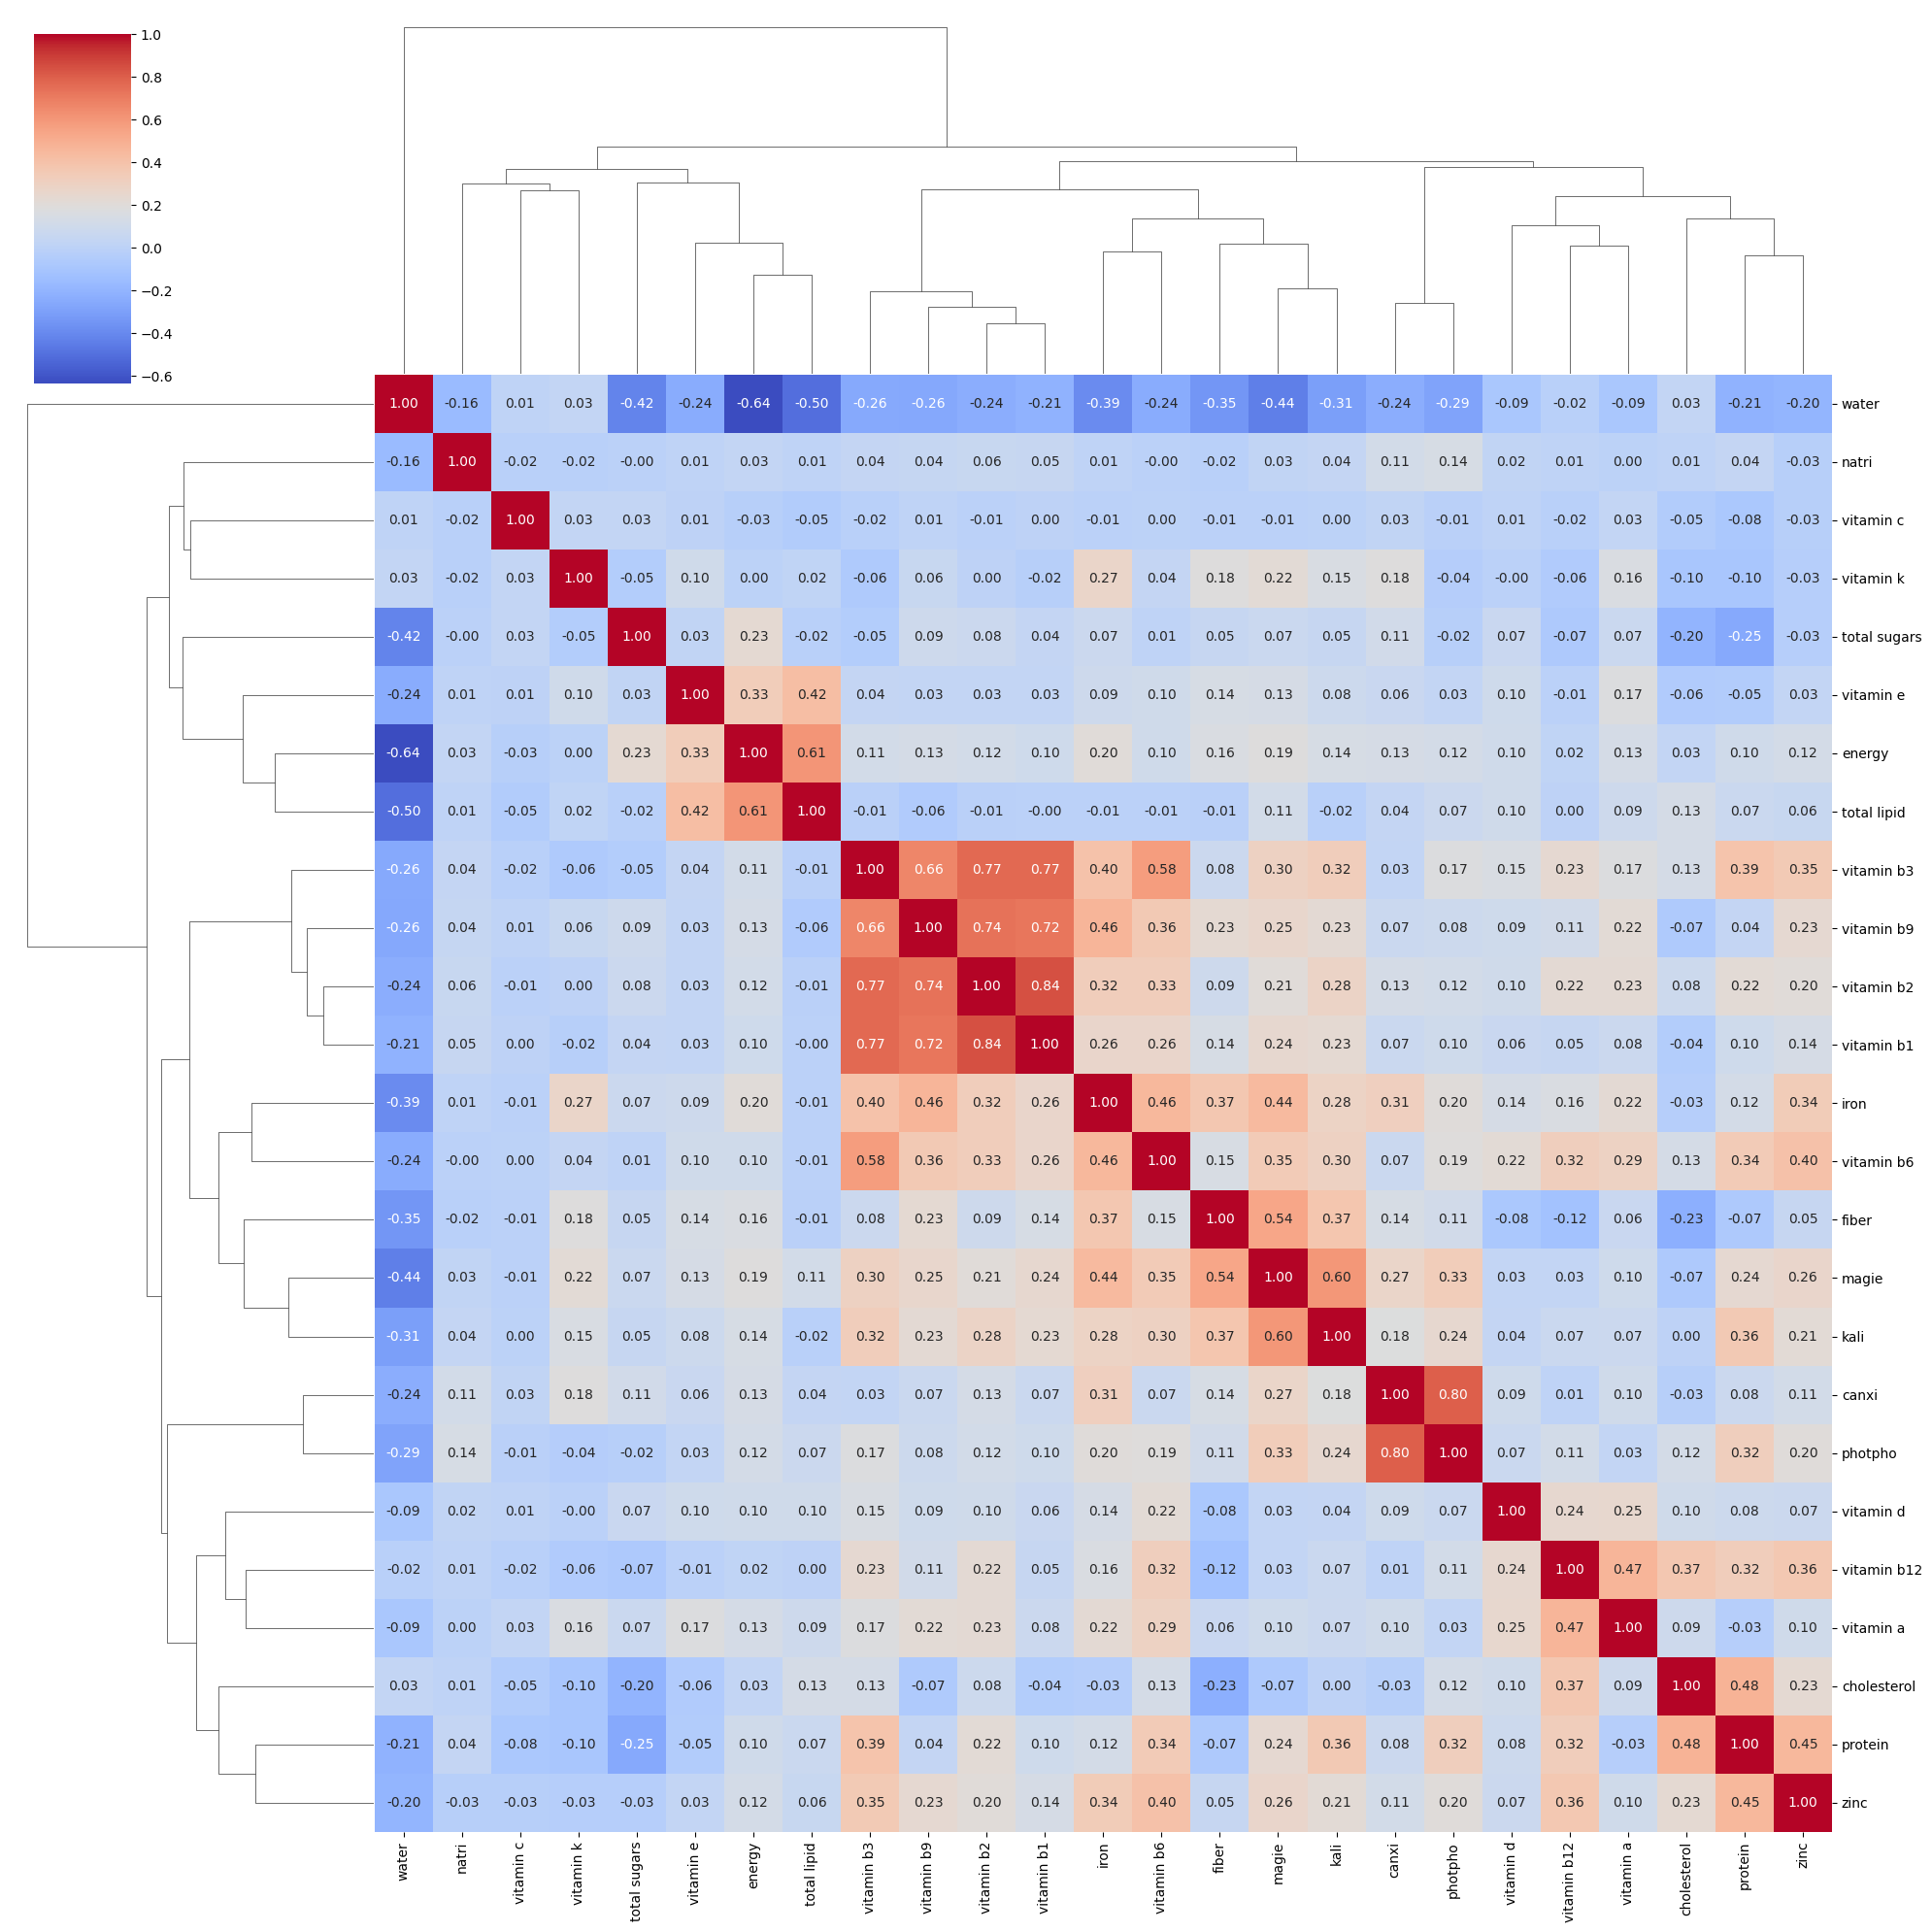

In [125]:
sns.clustermap(ramdom_sample.iloc[:, 1:].corr(), cmap='coolwarm', figsize=(20, 20), annot=True, fmt='.2f')

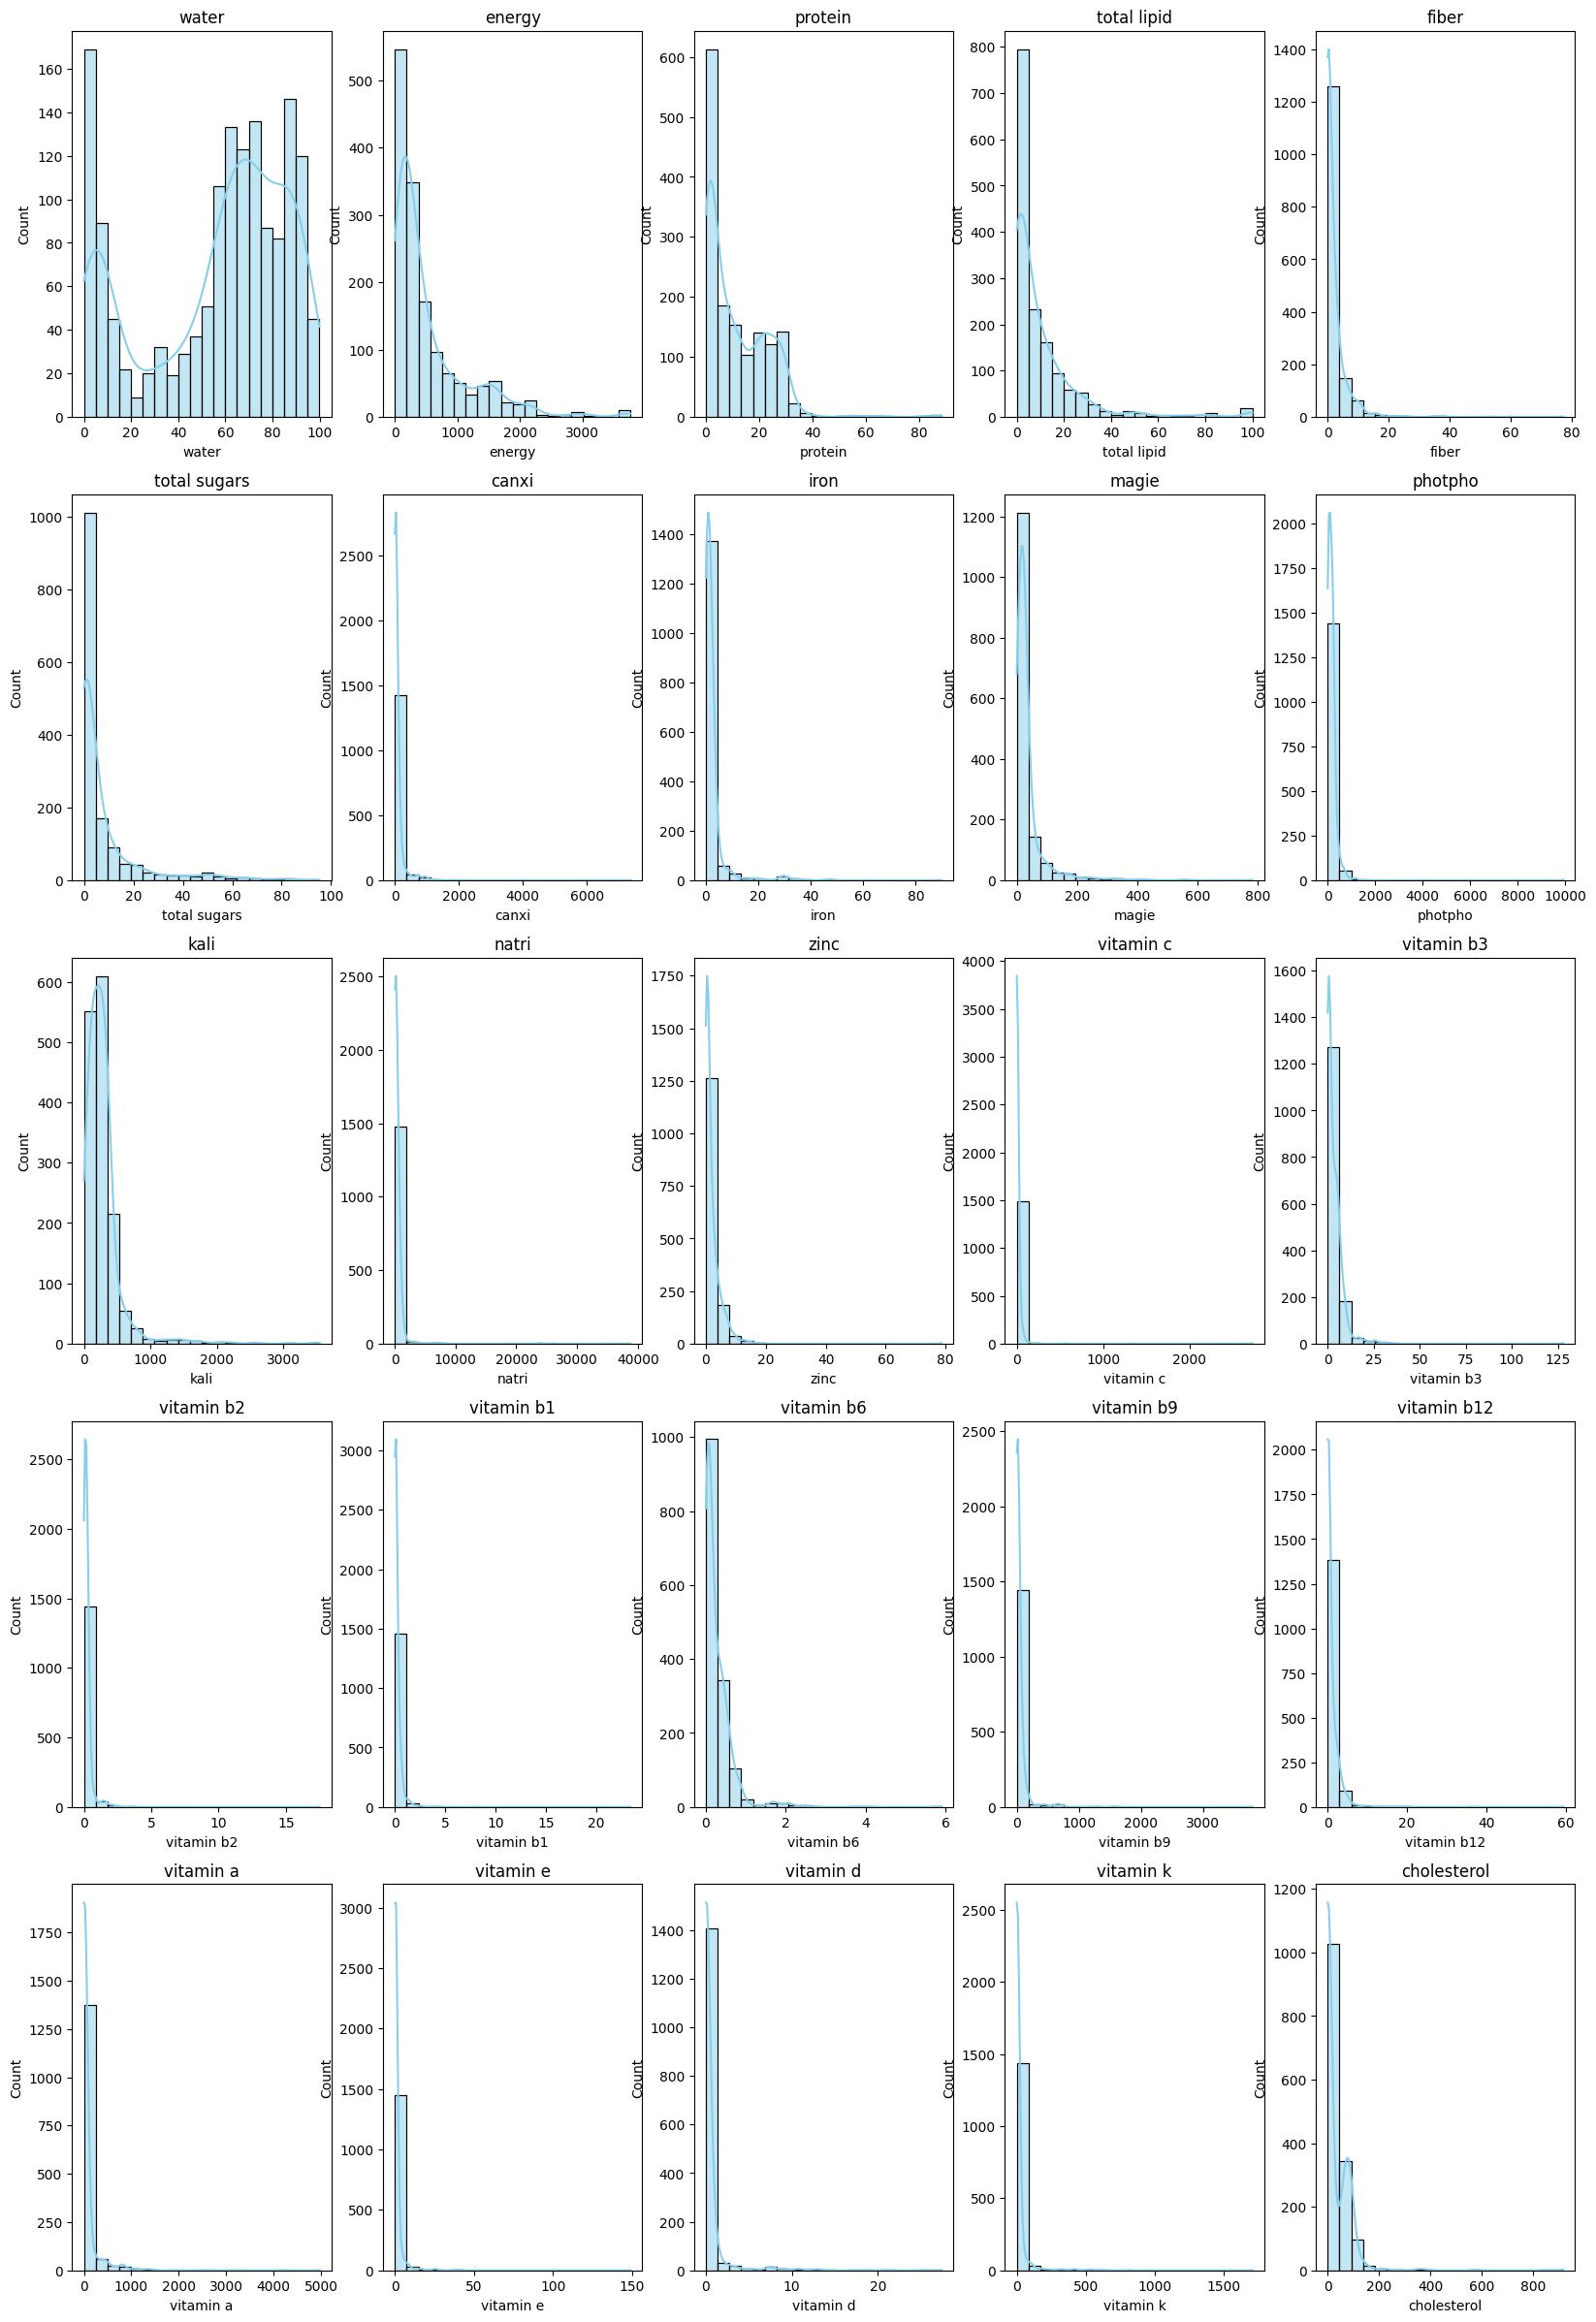

In [126]:
#hist plot all columns, using beuatiful color palette
plt.figure(figsize=(20, 30))
for index, column in enumerate(ramdom_sample.columns[1:]):
    plt.subplot(5, 5, index + 1)
    sns.histplot(ramdom_sample[column], bins=20, kde=True, color='skyblue')
    plt.title(column)
    

In [142]:
# count values of vitamin d
df_pure['canxi'].value_counts()

canxi
11.0      152
14.0      149
13.0      147
0.0       138
6.0       126
         ... 
575         1
717         1
1110.0      1
853         1
796         1
Name: count, Length: 429, dtype: int64

<Axes: xlabel='vitamin d', ylabel='Count'>

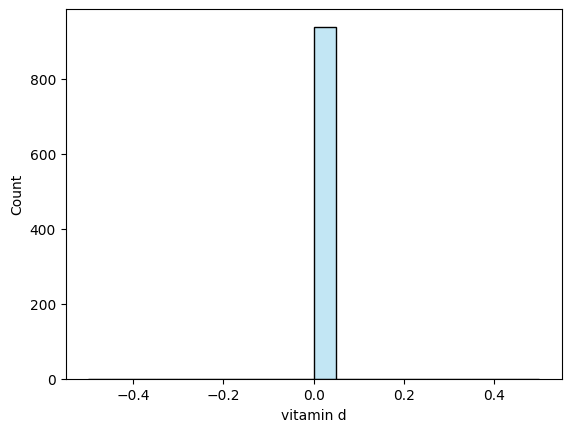

In [115]:
# filter value < 0.1 in column 'vitamin d' from random_sample
vitamin_d = ramdom_sample[ramdom_sample['vitamin d'] < 0.001]

sns.histplot (vitamin_d['vitamin d'], bins=20, kde=True, color='skyblue')